Task1_0730. 교차 검증을 위한 사용자 함수를 생성한 후 아래 회귀트리 모델들에 대한 교차검증을 수행하세요.
- dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
- rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
- gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
- xgb_reg = XGBRegressor(n_estimators=1000)
- lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = fetch_openml(name="Boston", parser='auto', version=1)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.drop(['CHAS','RAD'],axis=1,inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  PRICE    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [9]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

# 회귀모델 평가 함수
def get_model_cv_prediction(X_data, y_target):
    models = {
        'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0, max_depth=4),
        'RandomForestRegressor': RandomForestRegressor(random_state=0, n_estimators=1000),
        'GradientBoostingRegressor': GradientBoostingRegressor(random_state=0, n_estimators=1000),
        'XGBRegressor': XGBRegressor(n_estimators=1000),
        'LGBMRegressor': LGBMRegressor(n_estimators=1000, verbose=-1)
    }

    for model_name, model in models.items():
        neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'{model_name} 5 폴드 세트의 평균 RMSE: {avg_rmse:.4f}')


In [10]:
X_data = boston_df.drop('PRICE', axis=1)
y_target = boston_df['PRICE']

get_model_cv_prediction(X_data, y_target)

DecisionTreeRegressor 5 폴드 세트의 평균 RMSE: 5.9346
RandomForestRegressor 5 폴드 세트의 평균 RMSE: 4.4313
GradientBoostingRegressor 5 폴드 세트의 평균 RMSE: 4.2589
XGBRegressor 5 폴드 세트의 평균 RMSE: 5.0446
LGBMRegressor 5 폴드 세트의 평균 RMSE: 4.6226


Task2_0730. iris 데이터셋에 대하여 랜덤포레스트로 학습 및 평가한 결과와 차원축소한 후 c1,c2를 적용하여 학습 평가한 결과를 비교하세요. (단 cross_val_score를 적용하여 평가)

In [13]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

iris = load_iris()
X_data = iris.data
y_target = iris.target

rf_clf = RandomForestClassifier(random_state=0, n_estimators=1000)
neg_acc_scores = cross_val_score(rf_clf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
avg_acc = np.mean(neg_acc_scores)
print(f'원본 데이터 차원: {X_data.shape}')
print(f'랜덤포레스트 5 폴드 세트의 평균 RMSE: {avg_acc:.4f}')

원본 데이터 차원: (150, 4)
랜덤포레스트 5 폴드 세트의 평균 RMSE: -0.0400


In [18]:
# 차원 축소 후 c1,c2 적용 학습 평가 결과
from sklearn.preprocessing import StandardScaler

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_data)

# PCA 후 데이터의 차원 출력
rf_clf_pca = RandomForestClassifier(random_state=0, n_estimators=1000)
neg_acc_scores_pca = cross_val_score(rf_clf_pca, X_pca, y_target, scoring="neg_mean_squared_error", cv=5)
avg_acc_pca = np.mean(neg_acc_scores_pca)
print(f'PCA 변환 후 데이터 차원: {X_pca.shape}')
print(f'PCA 변환 후 랜덤포레스트 5 폴드 세트의 평균 RMSE: {avg_acc_pca:.4f}')

PCA 변환 후 데이터 차원: (150, 2)
PCA 변환 후 랜덤포레스트 5 폴드 세트의 평균 RMSE: -0.0667



Task3_0730. 상관도가 높은 BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성에 대하여 2개의 컴포넌트로 PCA 변환하고 변동성을 알아보기 위하여 explained_variance_ratio_ 계산하세요.

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/creditcard.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


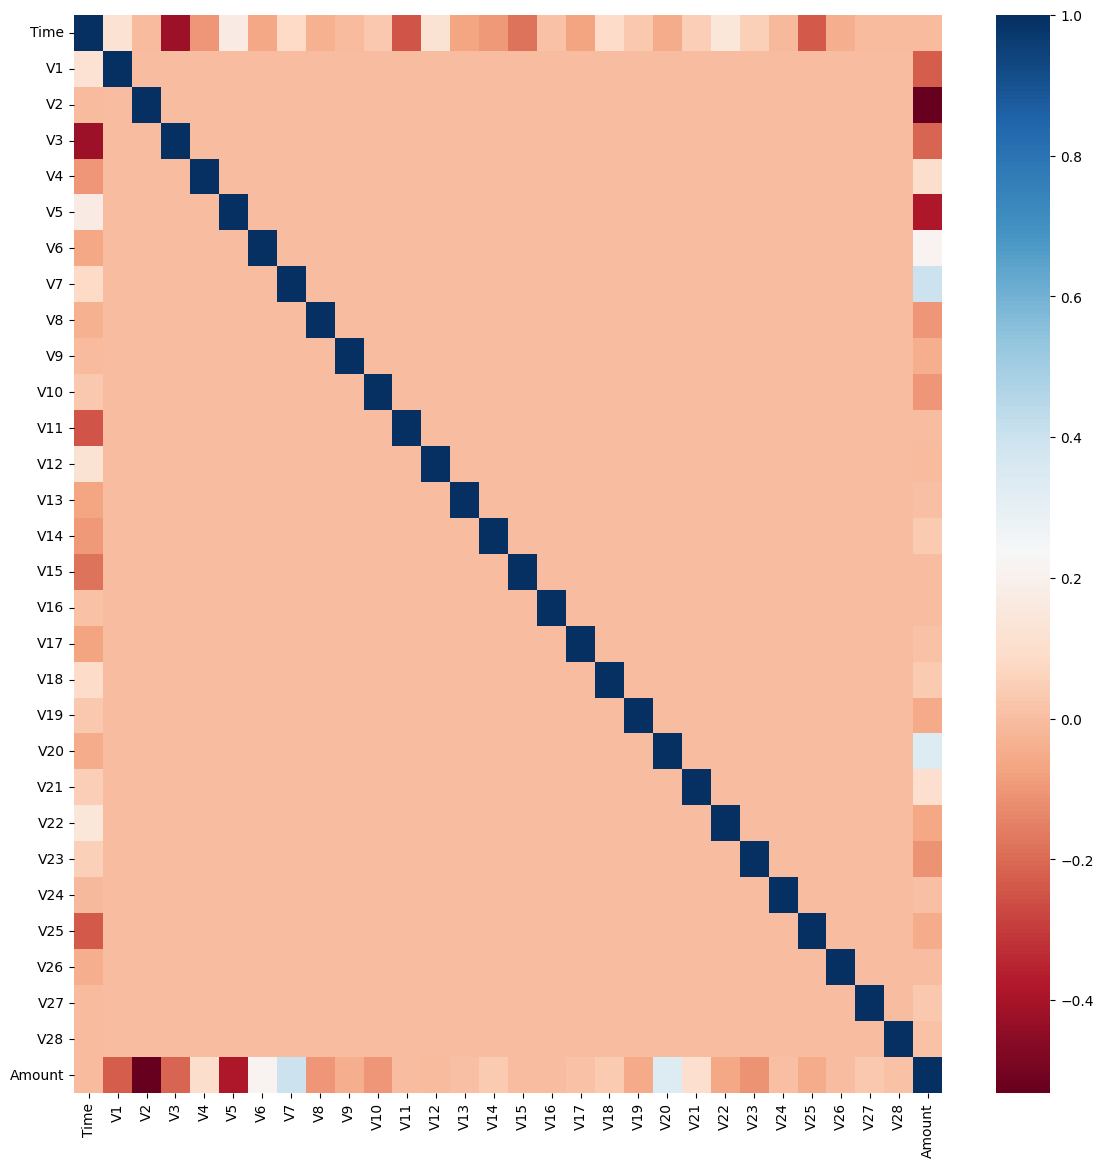

In [8]:
# 상관계수 확인
import seaborn as sns
import matplotlib.pyplot as plt

X_features = df.drop('Class', axis=1)
corr = X_features.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=False, cmap='RdBu')
plt.show()

In [17]:
from sklearn.decomposition import PCA

features = ['V1', 'V2', 'V3', 'V5', 'V11', 'V25']
X_features = df[features]
y_target = df['Class']

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_features)

print(f'PCA 변환 후 데이터 차원: {pca_transformed.shape}')
print(f'데이터 변동성: {pca.explained_variance_ratio_}')

PCA 변환 후 데이터 차원: (284807, 2)
데이터 변동성: [0.31756374 0.22571135]


Task4_0730. 신용카드 데이터셋 전체 23개 속성에 대하여 6개의 컴포넌트를 가진 PCA 변환을 수행하고 모델은 RF, cv=3, scoring='accuracy'을 적용하여 cross_val_score()로 분류 예측 수행하세요.

In [18]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/creditcard.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

X_features = df.drop('Class', axis=1)
y_target = df['Class']

pca = PCA(n_components=6)
pca_transformed = pca.fit_transform(X_features)

rf_clf = RandomForestClassifier(random_state=0, n_estimators=100)
neg_acc_scores = cross_val_score(rf_clf, pca_transformed, y_target, scoring="accuracy", cv=3)

print(f'PCA 변환 후 랜덤포레스트 3 폴드 세트의 평균 정확도: {np.mean(neg_acc_scores):.4f}')